# DEMO Part 2: Exploratory Data Analysis & Driver Pool Selection

## Loading Packages and Prepared Data

In [1]:
import pandas as pd
import Technic as tc
from Technic import TSFM, DumVar

In [2]:
%%capture
%run DEMO_1_Data_Prep.ipynb

### EDA

In [8]:
top30_home_price_predictors = [
    # Housing / real estate core
    # 'USCSH', 
    'USHS', 'USHHPDI',

    # Mortgage & key rates (financing channel)
    'USMORT30Y', 'USMORT15Y', 'USPRIME', 'USFF', 'USGOV10Y', 'USGOV2Y',

    # Yield curve / term premia
    'USYC10_2', 'USYC10_6M', 'USREAL_TERM_PREM_PROXY', 'USMORT30_T10_SPRD',

    # Credit conditions
    'USCORPBBB10Y', 'USCORPAA10Y', 'USCORP_SPRD_BAA_AAA', 'USCORP_SPRD_BAA_T10',

    # Inflation / cost pressures (construction + general)
    'USGDPDEF', 'USPPI', 'USCOSTAR', 'USCCPI',

    # Income / spending / labor (demand fundamentals)
    'USDI', 'USRPDI', 'USUR', 'USNC', 'USRC', 'USPSR',

    # Liquidity / leverage / credit availability
    'USM2', 'USCC', 'USCREDIT_CC_INC', 'USLIQ_M2_GDP',
]

Plotting top 15 transformation(s) by absolute correlation: USCORPAA10Y_LV_L3, USCORPBBB10Y_LV_L1, USCORPAA10Y_LV_L2, USCORPBBB10Y_LV, USCORPBBB10Y_LV_L2, USHHPDI_LV, USHHPDI_LV_L1, USHHPDI_LV_L2, USCORPAA10Y_LV_L1, USCORPBBB10Y_LV_L3, USHHPDI_LV_L3, USCORPAA10Y_LV, USLIQ_M2_GDP_LV_L2, USLIQ_M2_GDP_LV_L1, USLIQ_M2_GDP_LV


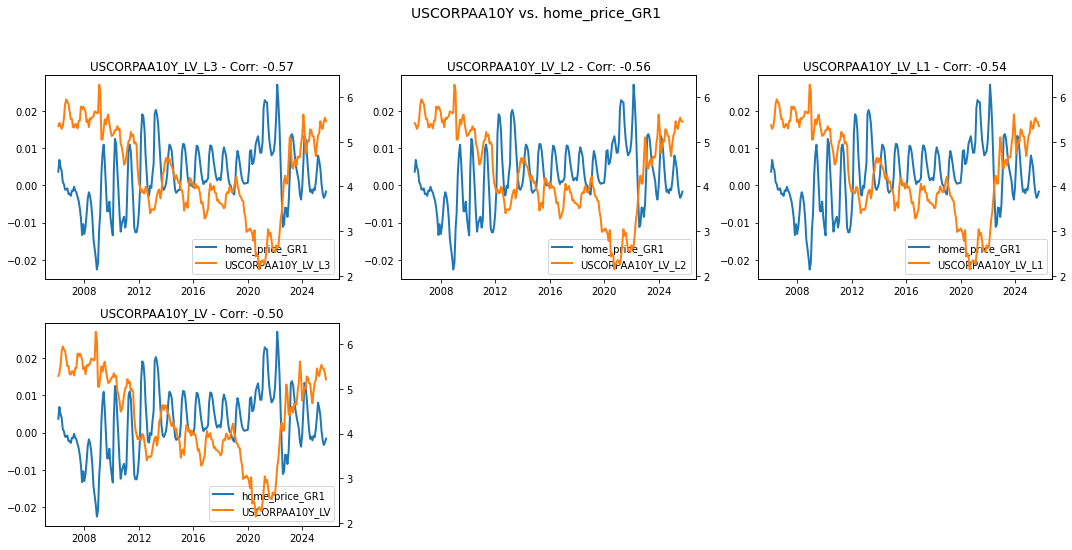

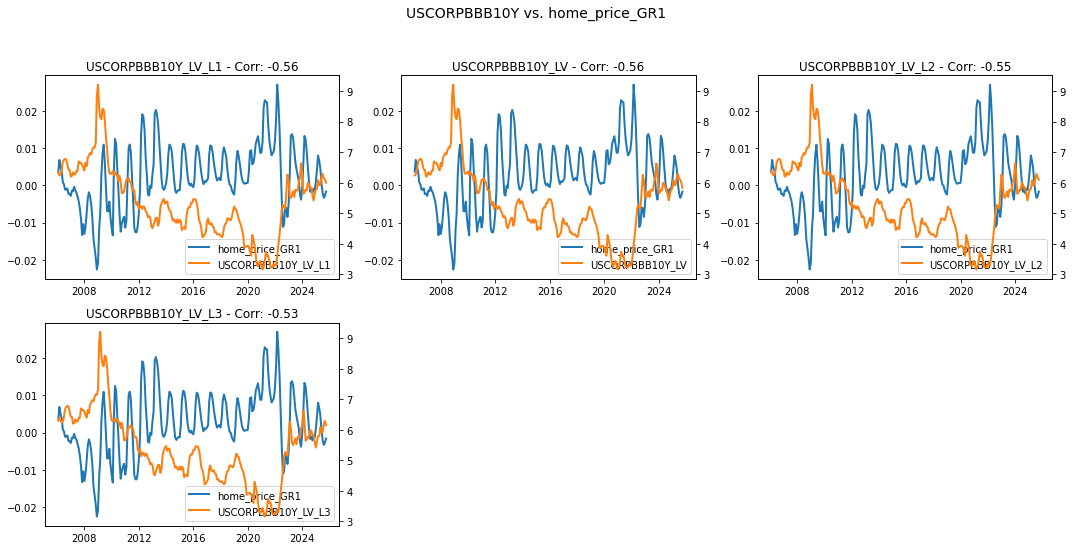

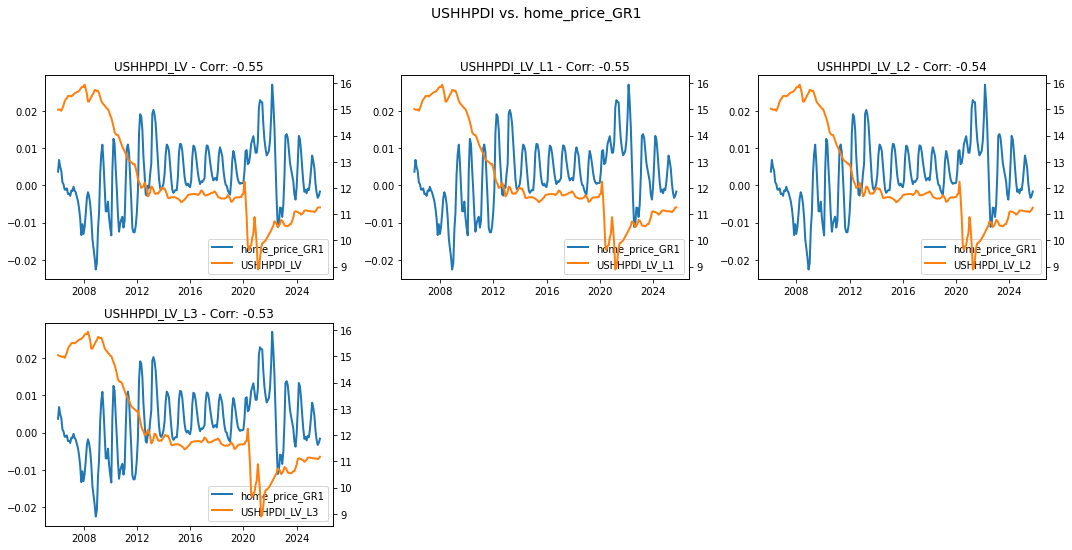

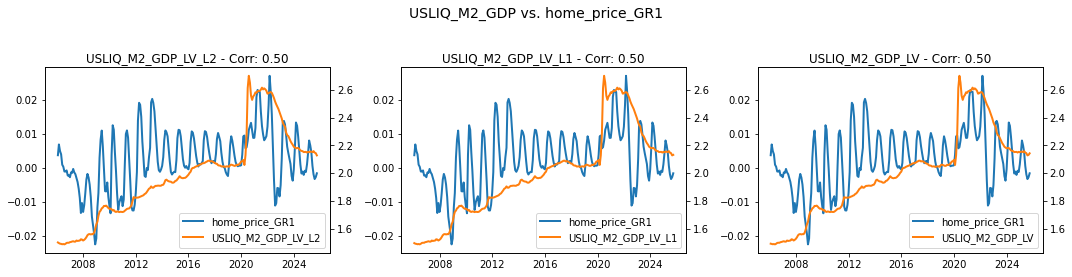

,variable,corr,abs_corr
0,USCORPAA10Y_LV_L3,-0.567494,0.567494
1,USCORPBBB10Y_LV_L1,-0.563917,0.563917
2,USCORPAA10Y_LV_L2,-0.558902,0.558902
3,USCORPBBB10Y_LV,-0.558547,0.558547
4,USCORPBBB10Y_LV_L2,-0.552854,0.552854
5,USHHPDI_LV,-0.549524,0.549524
6,USHHPDI_LV_L1,-0.548959,0.548959
7,USHHPDI_LV_L2,-0.542270,0.542270
8,USCORPAA10Y_LV_L1,-0.537142,0.537142
9,USCORPBBB10Y_LV_L3,-0.532894,0.532894


In [9]:
# Explore Vars
df_corr = seg.explore_vars(top30_home_price_predictors,
                           plot_top=15
                        )

df_corr.head(10)

In [ ]:
# seg1.show_report(show_params=True, show_tests=True)

In [ ]:
# seg1.cms['cm2'].show_report()

In [ ]:
# CM1
indep_vars = ['NGDP']
seg1.build_cm('cm1', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP

In [ ]:
# CM2
m_dum = tc.DumVar('M')
indep_vars = [m_dum, 'NGDP']
seg1.build_cm('cm2', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12

In [ ]:
from Technic import GR2
# CM3
m_dum = tc.DumVar('M', categories=[2,3,4,5,6,7])
tsfm_var = [TSFM('PSR', 'GR2')]

indep_vars = [m_dum, 'NGDP', tsfm_var]
seg1.build_cm('cm3', indep_vars)

OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_MMGR2

In [ ]:
# seg1.cms['cm3'].model_in.testset.tests[3].test_result

In [ ]:
# from TECHNIC import GR2
# # CM4
# m_dum = tc.DumVar('M', mode='group', categories=[(2,3,4),5,6,7])
# tsfm_var = [TSFM('PSR', 'GR2')]

# indep_vars = [m_dum, 'NGDP', tsfm_var]
# seg1.build_cm('cm4', indep_vars)

=== Candidate Models to Report ===
- cm1: OLS-HAC(3):VR_balance~C+NGDP
- cm2: OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS-HAC(3):VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_MMGR2


=== In-Sample Performance ===
         R²  Adj R²      ME     MAE    RMSE
Model                                      
cm1   0.582   0.575 513.446 167.665 204.682
cm2   0.686   0.603 506.517 135.983 177.538
cm3   0.709   0.662 396.106 133.229 170.781

=== Out-of-Sample Performance ===


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Metric      ME     MAE    RMSE
Model                         
cm1    724.093 407.900 424.200
cm2    841.290 323.480 382.935
cm3    963.937 354.942 423.198

=== Performance Plot ===


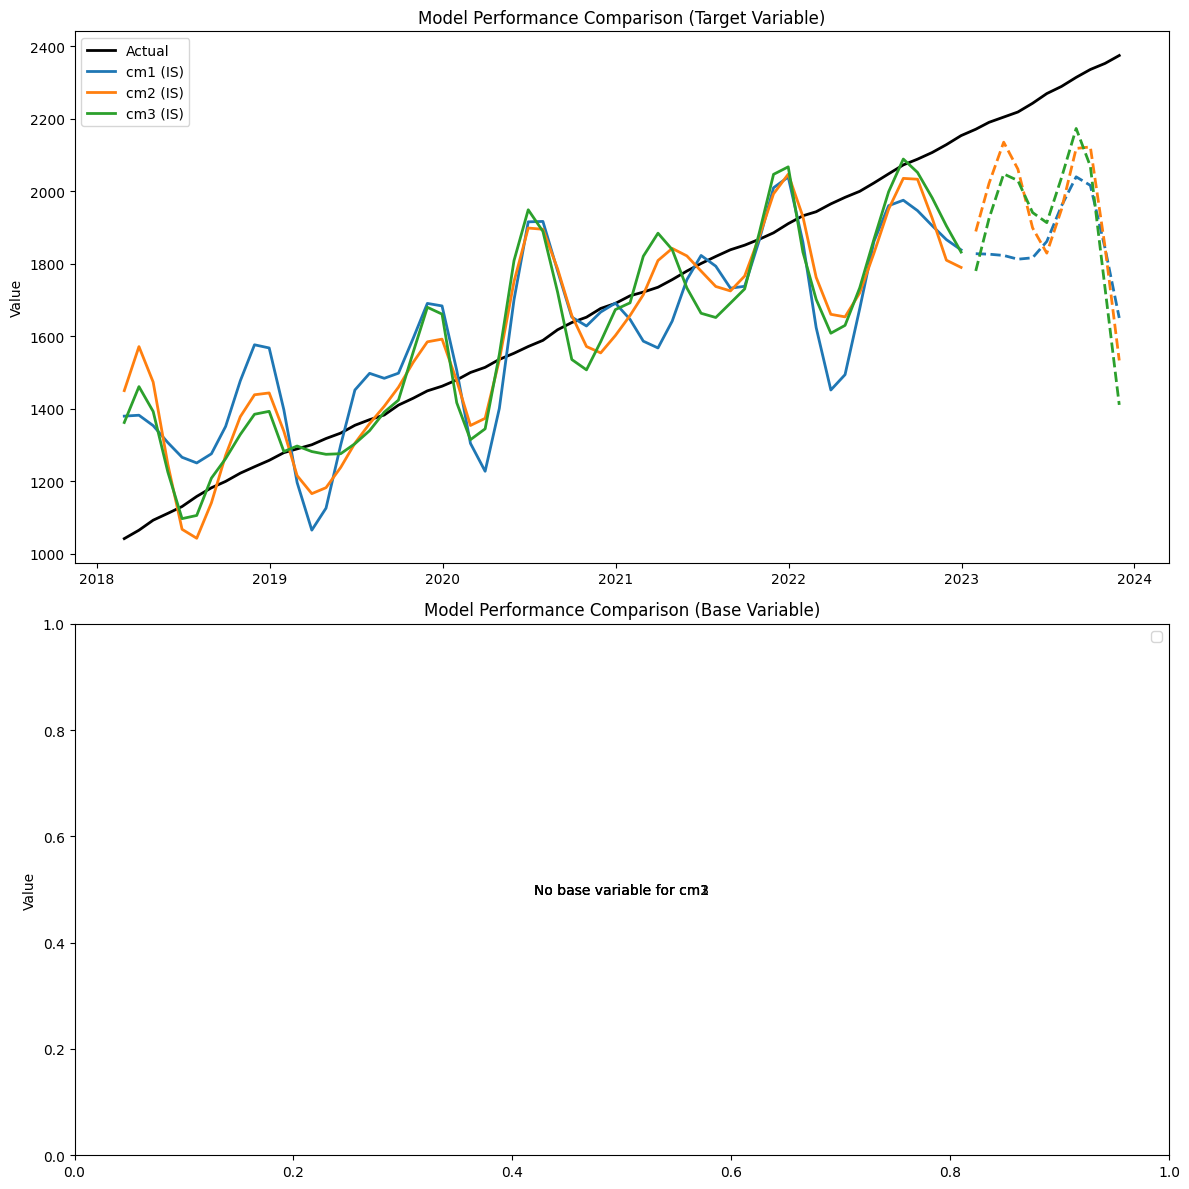


=== Model: cm1 — Parameters ===
  Variable          Coef        Pvalue  VIF            SE         CI_2_5       CI_97_5
0    const -78301.749723  1.092747e-07  NaN  12893.867084 -104121.273180 -52482.226266
1     NGDP    773.255343  6.775415e-08  1.0    124.737787     523.472233   1023.038452

=== Model: cm2 — Parameters ===
   Variable           Coef        Pvalue       VIF            SE         CI_2_5       CI_97_5
0     const -100637.173215  2.046538e-12       NaN  10596.702467 -121967.228935 -79307.117496
1      NGDP     989.385613  1.247820e-12  1.468251    102.525896     783.011689   1195.759537
2       M:2     134.249192  1.929498e-01  2.125486    101.607069     -70.275229    338.773613
3       M:3     252.533010  6.897947e-02  2.194805    135.615040     -20.445906    525.511926
4       M:4     191.299614  1.085522e-01  2.136672    116.893064     -43.993921    426.593148
5       M:5      24.256066  7.716707e-01  2.065070     83.095390    -143.006279    191.518410
6       M:6    

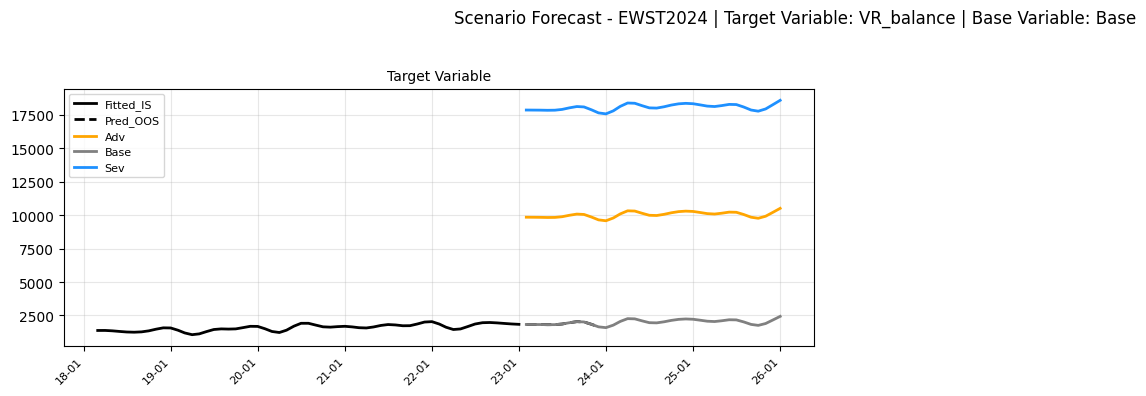

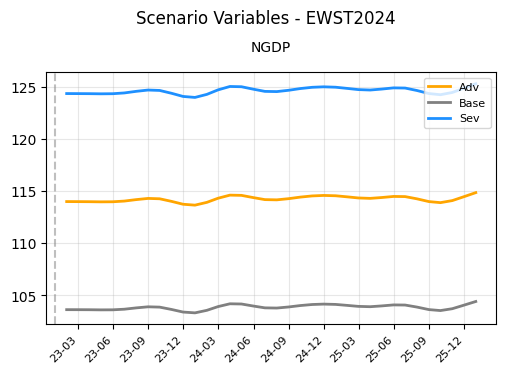


=== Model: cm2 — Scenario Analysis ===
Scenario plots for EWST2024 generated successfully.


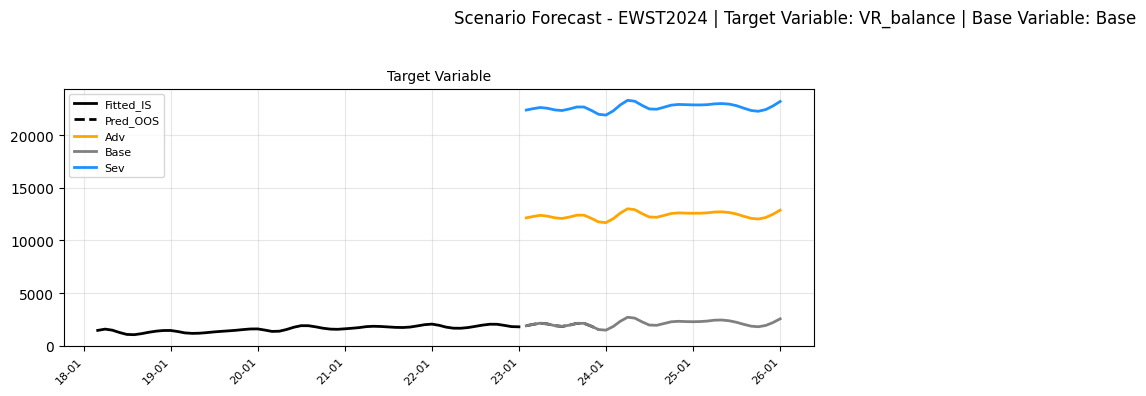

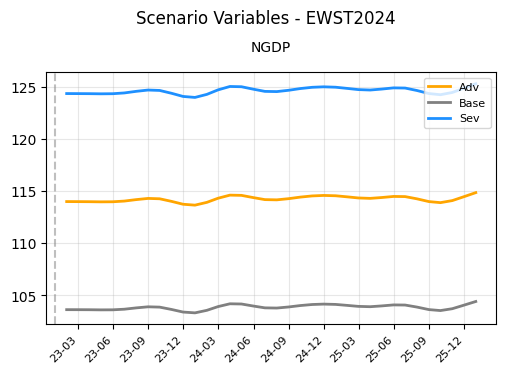


=== Model: cm3 — Scenario Analysis ===
Scenario plots for EWST2024 generated successfully.


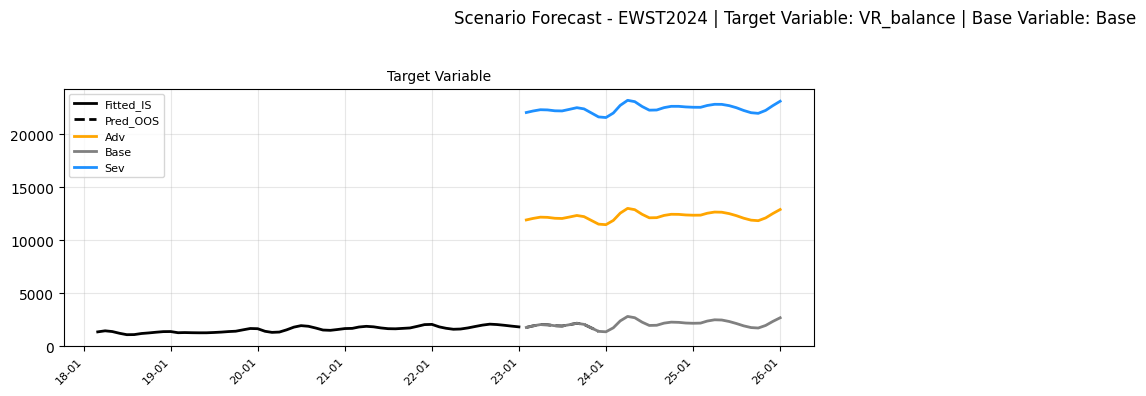

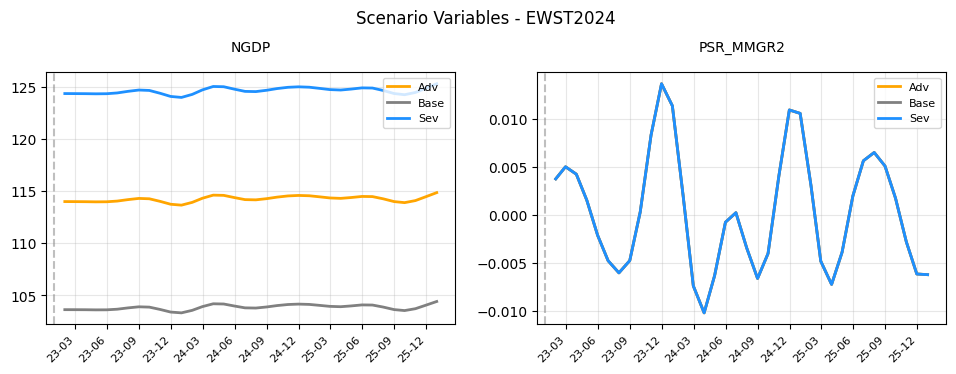

In [ ]:
seg1.show_report(show_params=True, show_tests=True, show_scens=True)

In [ ]:
vr_95 = seg1.dm.internal_data['VR_balance'].quantile(0.90)
vr_95

2218.766721015874

In [ ]:
from Technic import CondVar, BO
#cm4 with CondVars
mth_var = [tc.DumVar('M', categories=[2,3,4,5,6,7])]
tsfm_var = [TSFM('PSR', GR2)]
cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

indep_vars = [mth_var, 'NGDP', tsfm_var, cond_var]
seg1.build_cm('cm4', indep_vars)

TypeError: __init__() got an unexpected keyword argument 'threshold'

In [ ]:
(seg1.cms['cm4'].model_full.y > vr_95).loc[lambda x: x==1]

Date
2023-05-31    True
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, Name: VR_balance, dtype: bool

In [ ]:
tf = (seg1.cms['cm4'].model_full.X.VR_price_BO - seg1.dm.internal_data.VR_price) != 0
tf.loc[lambda x: x==1]

Date
2023-06-30    True
2023-07-31    True
2023-08-31    True
2023-09-30    True
2023-10-31    True
2023-11-30    True
Freq: M, dtype: bool

In [ ]:
cm = seg1.cms['cm4']
cm.model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Coefficient Significance', 'Residual Stationarity', 'Y–X Cointegration'])

In [ ]:
cm.model_in.testset.print_test_info()

Active Tests:
- In-Sample R² | filter_mode: moderate | desc: Require R² ≥ 0.3.
- Coefficient Significance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | filter_mode: moderate | desc: Threshold = 10
- Residual Stationarity | filter_mode: moderate | desc: At least half of stationarity tests must pass.
- Y–X Cointegration | filter_mode: moderate | desc: At least half of tests must show X variables are non-stationary and residuals are stationary.
- Sign Check | filter_mode: moderate | desc: All coefficients must have expected signs.

Inactive Tests:
- Fit Measures
- IS Error Measures
- OOS Error Measures
- Residual Normality
- Residual Autocorrelation
- Residual Heteroscedasticity
- Y Stationarity

Note: These tests are included but not turned on. Set `filter_on=True` on a test to include it in filter_pass results.


### Test

In [ ]:
seg1.cms['cm4'].model_in.testset.filter_pass(fast_filter=False)

(False,
 ['Common Driver Significance',
  "Group Driver F-Test M:2'3'4'5'6'7",
  'Residual Stationarity'])

# Test Export

In [ ]:
seg1.export(model_ids=['cm1','cm3','cm4'], content=['test_results'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 3
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: test_results

Preparing export...

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


In [ ]:
seg1.export(model_ids=['cm3'], content=['timeseries_data', 'staticStats'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 1
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: staticStats, timeseries_data

Preparing export...

Successfully exported model statistics to /Users/kexinz8/Project_LEGO/staticStats.csv

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


In [ ]:
seg1.export(model_ids=['cm1'], content=['timeseries_data', 'staticStats'])


Starting export for segment 'VR':
- Target variable: VR_balance
- Number of models: 1
- Output directory: /Users/kexinz8/Project_LEGO
- Content types to export: staticStats, timeseries_data

Preparing export...

Export completed successfully for segment 'VR'!
Results have been saved to: /Users/kexinz8/Project_LEGO


## Search

In [ ]:
mdlsrch_config = {
    'dm': dm,
    'target': 'VR_balance',
    'model_cls': tc.OLS
}

srch = tc.ModelSearch(**mdlsrch_config)

In [ ]:
dm.model_mev.head()

nan,NGDP,PSR,PDI,UNRATE,CPI,NGDP-Price,PDI-FixBal,M,Q
2000-03-31,100.160000,10032.570000,8047.460000,3.640000,3.080000,NaN,NaN,3,1
2000-04-30,99.896506,10049.097386,8036.334431,4.098958,2.067059,NaN,NaN,4,2
2000-05-31,99.768751,10031.340067,8037.305959,4.332339,2.532845,NaN,NaN,5,2
2000-06-30,99.740000,9996.180000,8044.020000,4.420000,3.960000,NaN,NaN,6,2
2000-07-31,99.761353,9957.712737,8050.351074,4.466939,5.934583,NaN,NaN,7,3


In [ ]:
forced_in = [tc.DumVar('M', categories=[2,3,4])]
desired_pool = [('PDI', 'PSR'), ['NGDP', tc.DumVar('M', categories=[2,3,4])], {'UNRATE', 'CPI', 'VR_price',}]

srch.build_spec_combos(forced_in=None, desired_pool=desired_pool, max_var_num=4, max_lag=2, max_periods=2)
srch.all_specs

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


[[('PDI', 'PSR')],
 [['NGDP', DumVar:M:2'3'4]],
 [TSFM:CPI_LV],
 [TSFM:CPI_LV_L1],
 [TSFM:CPI_LV_L2],
 [TSFM:CPI_DF],
 [TSFM:CPI_DF_L1],
 [TSFM:CPI_DF_L2],
 [TSFM:CPI_DF2],
 [TSFM:CPI_DF2_L1],
 [TSFM:CPI_DF2_L2],
 [TSFM:CPI_GR],
 [TSFM:CPI_GR_L1],
 [TSFM:CPI_GR_L2],
 [TSFM:CPI_GR2],
 [TSFM:CPI_GR2_L1],
 [TSFM:CPI_GR2_L2],
 [TSFM:UNRATE_LV],
 [TSFM:UNRATE_LV_L1],
 [TSFM:UNRATE_LV_L2],
 [TSFM:UNRATE_DF],
 [TSFM:UNRATE_DF_L1],
 [TSFM:UNRATE_DF_L2],
 [TSFM:UNRATE_DF2],
 [TSFM:UNRATE_DF2_L1],
 [TSFM:UNRATE_DF2_L2],
 [TSFM:UNRATE_GR],
 [TSFM:UNRATE_GR_L1],
 [TSFM:UNRATE_GR_L2],
 [TSFM:UNRATE_GR2],
 [TSFM:UNRATE_GR2_L1],
 [TSFM:UNRATE_GR2_L2],
 ['VR_price'],
 [('PDI', 'PSR'), ['NGDP', DumVar:M:2'3'4]],
 [('PDI', 'PSR'), TSFM:CPI_LV],
 [('PDI', 'PSR'), TSFM:CPI_LV_L1],
 [('PDI', 'PSR'), TSFM:CPI_LV_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF],
 [('PDI', 'PSR'), TSFM:CPI_DF_L1],
 [('PDI', 'PSR'), TSFM:CPI_DF_L2],
 [('PDI', 'PSR'), TSFM:CPI_DF2],
 [('PDI', 'PSR'), TSFM:CPI_DF2_L1],
 [('PDI', 'PSR'), TSFM

In [ ]:
passed_cms, failed_info, error_log = srch.filter_specs()

Filtering Specs: 100%|██████████| 127/127 [00:10<00:00, 11.94it/s, estimated_finish=2025-06-15 17:08:31]


In [ ]:
error_log

[]

In [ ]:
failed_info

[([('PDI', 'PSR')], ['In-Sample R²']),
 ([['NGDP', DumVar:M:2'3'4]], ['Residual Stationarity']),
 ([TSFM:CPI_LV], ['In-Sample R²']),
 ([TSFM:CPI_LV_L1], ['In-Sample R²']),
 ([TSFM:CPI_LV_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF], ['In-Sample R²']),
 ([TSFM:CPI_DF_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF_L2], ['In-Sample R²']),
 ([TSFM:CPI_DF2], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L1], ['In-Sample R²']),
 ([TSFM:CPI_DF2_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR], ['In-Sample R²']),
 ([TSFM:CPI_GR_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR_L2], ['In-Sample R²']),
 ([TSFM:CPI_GR2], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L1], ['In-Sample R²']),
 ([TSFM:CPI_GR2_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_LV], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_LV_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L1], ['In-Sample R²']),
 ([TSFM:UNRATE_DF_L2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2], ['In-Sample R²']),
 ([TSFM:UNRATE_DF2_L1], ['In-Sample R²'])

In [ ]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

passed_cms, failed_info, error_log = srch.filter_specs(test_update_func=test_update_func)

Filtering Specs: 100%|██████████| 127/127 [00:09<00:00, 13.13it/s, estimated_finish=2025-06-15 17:08:41]


In [ ]:
passed_cms

[OLS:VR_balance~C+NGDP+M:2+M:3+M:4,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_DF2_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR_L1,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+CPI_GR2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_LV_L2,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_DF,
 OLS:VR_balance~C+NGDP+M:2+M:3+M:4+UNRATE_GR]

In [ ]:
error_log

[]

In [ ]:
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))


def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False}
    }

    return update_map

seg1.cms['cm3'].model_in.load_testset(test_update_func=test_update_func)
print(seg1.cms['cm3'].model_in.testset.filter_pass(fast_filter=False))

(False, ["Group Driver F-Test M:2'3'4'5'6'7", 'Residual Stationarity'])
(False, ["Group Driver F-Test M:2'3'4'5'6'7"])


In [ ]:
def test_update_func(mdl):

    update_map = {
    'Residual Stationarity': {'filter_on': False},
    'In-Sample R²': {'thresholds':{'strict': 0.8, 'moderate': 0.7}}
    }

    return update_map


forced_in = []
desired_pool = [['PDI', 'PSR'], 'NGDP', {'UNRATE', 'CPI'}, 'VR_price', tc.DumVar('M', categories=[2,3,4])]
seg1.search_cms(desired_pool=desired_pool, forced_in=forced_in, test_update_func=test_update_func, outlier_idx=["2018-04-30", "2018-05-31"])

e:\OneDrive\Git\Project_LEGO\Technic\data.py:864: UserWarning: No type mapping for variables: ['VR_price'], using raw-only
  warnings.warn(


=== ModelSearch Configuration ===
Target          : VR_balance
Model class     : OLS
Desired pool    : [['PDI', 'PSR'], 'NGDP', {'CPI', 'UNRATE'}, 'VR_price', DumVar:M:2'3'4]
Forced in       : []
Sample          : in
Max var num     : 5
Max lag         : 3
Max periods     : 3
Top N           : 10
Rank weights    : (1, 1, 1)
Test update func: <function test_update_func at 0x000001DC47D4F3A0>

Built 7751 spec combinations.

--- Example TestSet Info ---
Active Tests:
- In-Sample R² | category: fit | filter_mode: moderate | desc: Require R² ≥ 0.7.
- Common Driver Significance | category: performance | filter_mode: moderate | desc: Require p-value < 0.10 for all coefficients.
- Multicollinearity | category: base | filter_mode: moderate | desc: Threshold = 10
- Residual Normality | category: assumption | filter_mode: moderate | desc: At least half of normality tests must pass.
- Y–X Cointegration | category: assumption | filter_mode: moderate | desc: Require Engle–Granger p-value < 0.10

Ina

Filtering Specs:   0%|          | 8/7751 [00:00<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

KeyboardInterrupt: 

Filtering Specs:   0%|          | 9/7751 [00:20<08:57, 14.40it/s, estimated_finish=2025-06-15 17:17:36]

In [ ]:
seg1.searcher.analyze_failures()


=== Failed Spec Combinations Analysis ===
Total failed spec combos: 7742

1) Failure counts by test:
                 Test Name  Failure Count
              In-Sample R²           6749
Common Driver Significance            955
         Y–X Cointegration             35
        Residual Normality              3


2) Top 5 most frequent failed tests and their common spec elements:

  Test: In-Sample R²
    Number of combos that failed this test: 6749
    Top 3 spec elements contributing to this failure:
      • VR_price  (appeared in 3375 combos)
      • DumVar:M:2'3'4  (appeared in 3330 combos)
      • ['PDI', 'PSR']  (appeared in 2964 combos)

  Test: Common Driver Significance
    Number of combos that failed this test: 955
    Top 3 spec elements contributing to this failure:
      • ['PDI', 'PSR']  (appeared in 902 combos)
      • VR_price  (appeared in 500 combos)
      • DumVar:M:2'3'4  (appeared in 499 combos)

  Test: Y–X Cointegration
    Number of combos that failed this test:

=== Candidate Models to Report ===
- cm1: OLS:VR_balance~C+NGDP
- cm2: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+M:8+M:9+M:10+M:11+M:12
- cm3: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2
- cm4: OLS:VR_balance~C+NGDP+M:2+M:3+M:4+M:5+M:6+M:7+PSR_GR2+VR_price_BO
- cm1_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV_L1+UNRATE_LV_L2+M:2+M:3+M:4
- cm2_2: OLS:VR_balance~C+PDI+PSR+NGDP_LV+M:2+M:3+M:4
- cm3_2: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L3+M:2+M:3+M:4
- cm4_2: OLS:VR_balance~C+NGDP_LV+UNRATE_DF2_L3+M:2+M:3+M:4
- cm5: OLS:VR_balance~C+NGDP_LV+UNRATE_GR_L3+M:2+M:3+M:4
- cm6: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L3+M:2+M:3+M:4
- cm7: OLS:VR_balance~C+NGDP_LV+UNRATE_GR3_L2+M:2+M:3+M:4
- cm8: OLS:VR_balance~C+NGDP_LV+UNRATE_DF3_L2+M:2+M:3+M:4
- cm9: OLS:VR_balance~C+NGDP_LV+UNRATE_GR2_L2+M:2+M:3+M:4


=== In-Sample Performance ===
             r2    adj_r2          me         mae        rmse
Model                                                        
cm1    0.585757  0.578615  522.291195

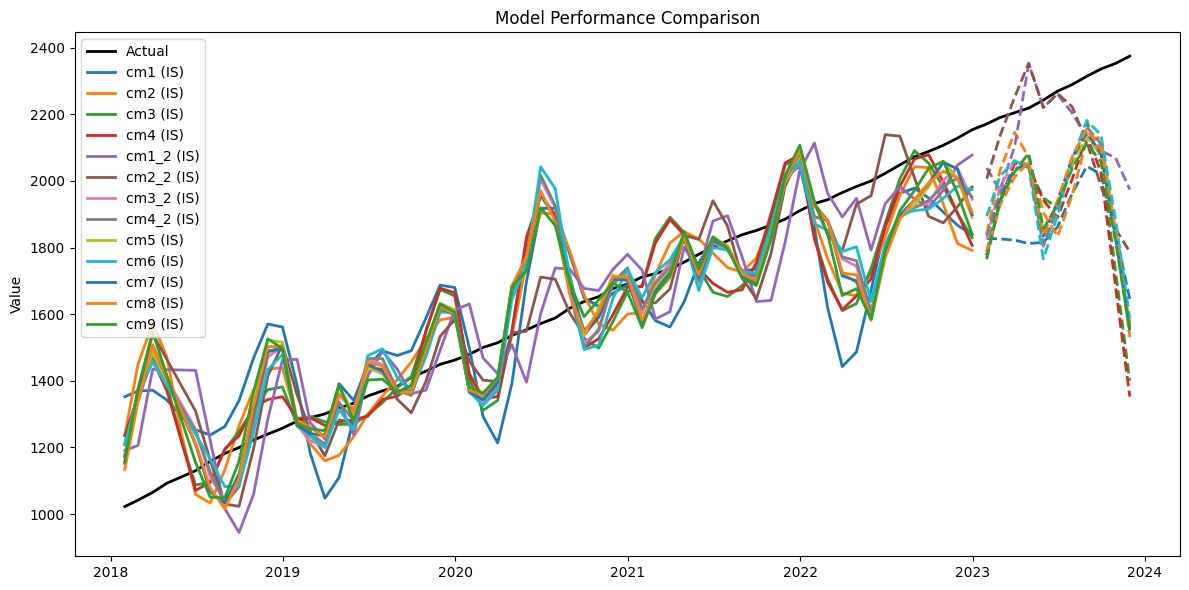


=== Model: cm1 — Testing Metrics ===

--- Fit Measures ---
R²        0.585757
Adj R²    0.578615

--- IS Error Measures ---
ME      522.291195
MAE     169.955421
RMSE    207.529157

--- OOS Error Measures ---
ME      728.482837
MAE     407.558730
RMSE    424.405214

--- In-Sample R² ---
R²    0.585757

--- Common Driver Significance ---
           P-value  Passed
NGDP  6.693432e-08    True

--- Multicollinearity ---
          VIF
Variable     
NGDP      1.0

--- Residual Stationarity ---
       Statistic   P-value  Passed
Test                              
ADF    -0.595801  0.871928   False
PP     -1.757428  0.401793   False
KPSS    0.842360  0.010000   False
ZA           NaN       NaN   False
DFGLS   0.953764  0.918276   False
RUR     1.678293  0.900000    True

--- Residual Normality ---
      Statistic   P-value  Passed
Test                             
JB     1.181627  0.553877    True
SW     0.975336  0.263710    True
KS     0.080475  0.802298    True
CM     0.031041  0.973589   

In [ ]:
seg1.show_report(show_tests=True)

In [ ]:
seg1.searcher.top_cms[0].testset_in.tests[3].thresholds

{'strict': 0.8, 'moderate': 0.7}

### Scenario

In [ ]:
# # Create a Scenario object
# mth_var = [f'M{i}' for i in range(2,5)]
# tsfm_var = [TSFM('PSR', 'GR2')]
# cond_var = CondVar('VR_price', 'VR_balance', BO, {'threshold': vr_95})

# scen_config = {
#     'dm': dm,
#     'model': cm.model_in,
#     'specs': [mth_var, 'NGDP', tsfm_var, cond_var],
#     'P0': '2023-08-31'
# }
# scen = tc.Scenario(**scen_config)
# y_scens = scen.y_scens

In [ ]:
# y_scens['fake_scens']['base'].dropna()

In [ ]:
# y_scens['fake_scens']['adv'].dropna()